In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns

pd.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
weath_pred=pd.read_csv("/content/drive/MyDrive/space_weather_dataset.csv")
weath_pred2=weath_pred.copy()
weath_pred.head()

,Solar_Flux,Sunspot_Number,Geomagnetic_Index,Event_Intensity
0,106.181018,95.071431,7.319939,77.516525
1,73.399178,5.808361,8.661761,41.768961
2,140.167252,70.807258,0.205845,88.462582
3,77.510676,30.424224,5.247564,46.306269
4,114.791753,29.122914,6.118529,65.216226


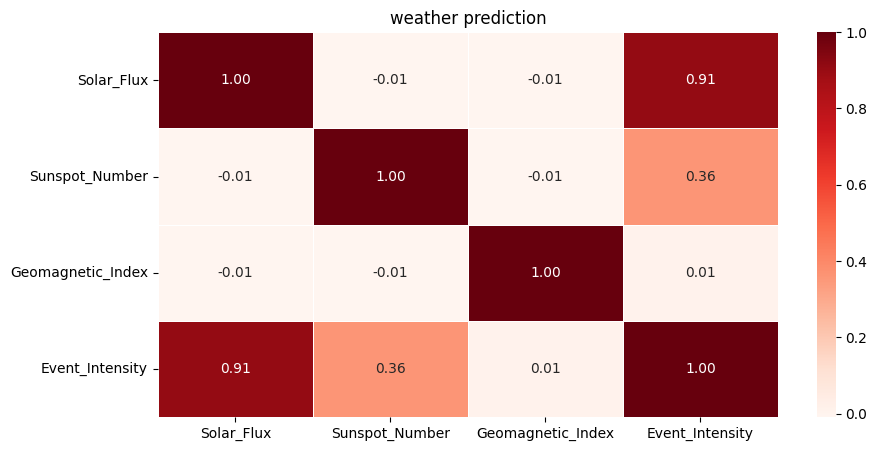

In [ ]:

correlation_matrix = weath_pred2.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("weather prediction")
plt.show()

In [ ]:
weath_pred2.shape

(500, 4)

In [ ]:
weath_pred2.describe()

,Solar_Flux,Sunspot_Number,Geomagnetic_Index,Event_Intensity
count,500.000000,500.000000,500.000000,500.000000
mean,125.384074,49.689885,4.946509,78.770954
std,43.613711,29.589199,2.876628,24.062530
min,50.740997,0.321826,0.069521,21.000261
25%,87.025191,23.615996,2.402138,60.158228
50%,126.796743,49.641370,5.030272,78.444829
75%,162.743742,76.114565,7.418271,97.300258
max,199.752127,99.941373,9.997177,138.463623


In [ ]:
weath_pred2.dtypes

,0
Solar_Flux,float64
Sunspot_Number,float64
Geomagnetic_Index,float64
Event_Intensity,float64


In [ ]:
weath_pred2[weath_pred2.duplicated(keep='first')]

,Solar_Flux,Sunspot_Number,Geomagnetic_Index,Event_Intensity


In [ ]:
weath_pred2=weath_pred2.drop_duplicates(keep='first')
weath_pred2.reset_index(inplace=True)

In [ ]:
weath_pred2.isnull().sum()

,0
Solar_Flux,0
Sunspot_Number,0
Geomagnetic_Index,0
Event_Intensity,0


In [ ]:
if 'index' in weath_pred2.columns:
  del weath_pred2['index']

In [ ]:
features=list()
for col in weath_pred2.columns:
  if col!='Event_Intensity':
    features.append(col)
target='Event_Intensity'

X=weath_pred[features]
y=weath_pred[target]

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.3,)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((350, 3), (150, 3), (350,), (150,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

x_train=sc.fit_transform(x_train)

x_test=sc.fit_transform(x_test)


In [ ]:
# Build the regression models and compare the results
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


ModelLR = LinearRegression()
ModelDC = DecisionTreeRegressor()
ModelRF = RandomForestRegressor(n_estimators = 100, random_state = 0)

MM = [ModelLR, ModelDC, ModelRF]

for models in MM:

    # Train the model training dataset

    models.fit(x_train, y_train)
    # Prediction the model with test dataset

    y_pred = models.predict(x_test)

    # Print the model name

    print('\nModel Name: ', models)

    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error


    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    print("\nEvaluation of model: \n")
    #mae
    mae=mean_absolute_error(actual,predicted)
    print("Mean Absolute Error: ",mae)

    #rmse
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    print("Root mean squared error: ",rmse)

    #r2score
    r2=r2_score(actual,predicted)
    print("R2 score: ",r2)
    print("\n<============================================>")


Model Name:  LinearRegression()

Evaluation of model: 

Mean Absolute Error:  4.097388156617451
Root mean squared error:  4.976651201806137
R2 score:  0.9558195968456807

<============================================>

Model Name:  DecisionTreeRegressor()

Evaluation of model: 

Mean Absolute Error:  5.635024285199999
Root mean squared error:  7.152969829701533
R2 score:  0.9087299992324298

<============================================>

Model Name:  RandomForestRegressor(random_state=0)

Evaluation of model: 

Mean Absolute Error:  4.821628267268665
Root mean squared error:  5.833997018726291
R2 score:  0.9392861639706991

<============================================>
